<a href="https://colab.research.google.com/github/kasattack567/Computer-Science/blob/main/Chocolate_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. The Chocolate Bar Problem: A Coding Challenge**

## **Introduction:**
In this problem, I use a heuristic and greedy approach to minimize the number of cuts to the chocolate bars.

###**Method:**
The method begins by checking if the total chocolate available is sufficient to satisfy all children. If it isn’t, the algorithm terminates immediately. Next, the bars and children's requirements are sorted in descending order. The largest child’s requirement is processed first, using the largest available bar. If the bar is larger than the requirement, a cut is made, and the leftover chocolate is reinserted for reuse. This ensures that no chocolate is wasted. The algorithm continues processing the remaining children while reusing remainders effectively. By prioritizing the largest requirements and bars, the method guarantees that all children are satisfied without unnecessary cuts, and it terminates successfully as long as the initial feasibility condition is met.

###**By ensuring that:**

sum(bars)
≥
sum(children)
sum(bars)≥sum(children),

No chocolate is wasted (remainders are reused),

The largest requirements are satisfied first (greedy choice),

The algorithm always terminates successfully and satisfies all children without returning -1, provided the initial feasibility condition holds. This guarantees that the method will reach a valid solution and avoids errors.

Approach 1:

Greedy approach, use every acsending and descending combination with children and bars, taking only the lowest number of cuts since some combinations perfrom better in certain situations that others.

In [34]:
def remove_matches(b, c):
    i = 0
    while i < len(c):
        if c[i] in b:
            b.remove(c[i])
            c.pop(i)
        else:
            i += 1


def chocolate_challenge(bars, children, bars_descending=True, children_descending=True):
    if sum(bars) < sum(children):
        return -1

    bars_sorted = sorted(bars, reverse=bars_descending)
    children_sorted = sorted(children, reverse=children_descending)

    remove_matches(bars_sorted, children_sorted)

    cuts = 0
    while children_sorted:
        current_child = children_sorted.pop(0)
        while current_child > 0:
            if not bars_sorted:
                return -1
            current_bar = bars_sorted.pop(0)
            if current_bar == current_child:
                current_child = 0
            elif current_bar > current_child:
                cuts += 1
                remainder = current_bar - current_child
                if remainder > 0:
                    bars_sorted.append(remainder)
                    bars_sorted.sort(reverse=bars_descending)
                current_child = 0
            else:
                current_child -= current_bar
        remove_matches(bars_sorted, children_sorted)

    return cuts

def best_chocolate_strategy(bars, children):
    # Run the four sorting strategies with the baseline approach
    attempts = []
    attempts.append(chocolate_challenge(bars, children, True, True))    # Bars Desc, Children Desc
    attempts.append(chocolate_challenge(bars, children, False, True))   # Bars Asc, Children Desc
    attempts.append(chocolate_challenge(bars, children, True, False))   # Bars Desc, Children Asc
    attempts.append(chocolate_challenge(bars, children, False, False))  # Bars Asc, Children Asc

    # Filter results
    valid_results = [res for res in attempts if res != -1]

    if not valid_results:
        # All -1
        return -1
    else:
        return min(valid_results)


# Test combined function
test_cases = [
    {"bars": [9, 6, 6, 6, 5], "children": [8, 8, 6], "expected": 2},
    {"bars": [15,15,2,2,2], "children": [10,10,9], "expected": 2},
    {"bars": [10, 10, 1,1,1,1,1,1], "children": [5,5,5,5,2,2,2], "expected": 2},
    {"bars": [2, 5], "children": [5, 3], "expected": -1},
    {"bars": [50,50,5,5,5,5,5], "children": [25,25,25,25,20], "expected": 2},
]

for i, case in enumerate(test_cases, 1):
    result = best_chocolate_strategy(case["bars"], case["children"])
    print(f"Test Case {i}:")
    print(f"Bars: {case['bars']}, Children: {case['children']}")
    print(f"Expected: {case['expected']}, Got: {result}")
    print("PASS" if result == case["expected"] else "FAIL")
    print()


Test Case 1:
Bars: [9, 6, 6, 6, 5], Children: [8, 8, 6]
Expected: 2, Got: 2
PASS

Test Case 2:
Bars: [15, 15, 2, 2, 2], Children: [10, 10, 9]
Expected: 2, Got: 3
FAIL

Test Case 3:
Bars: [10, 10, 1, 1, 1, 1, 1, 1], Children: [5, 5, 5, 5, 2, 2, 2]
Expected: 2, Got: 2
PASS

Test Case 4:
Bars: [2, 5], Children: [5, 3]
Expected: -1, Got: -1
PASS

Test Case 5:
Bars: [50, 50, 5, 5, 5, 5, 5], Children: [25, 25, 25, 25, 20]
Expected: 2, Got: 2
PASS



Approach 2:

Quadratic dynamic programming , good for inputs that require...

In [66]:
def minimal_cuts_optimized(bars, children, bars_order="desc", children_order="desc"):
    from collections import Counter

    # Sort bars and children according to the provided order
    if bars_order == "asc":
        bars = sorted(bars)
    else:
        bars = sorted(bars, reverse=True)

    if children_order == "asc":
        children = sorted(children)
    else:
        children = sorted(children, reverse=True)

    if sum(bars) < sum(children):
        return -1

    def subset_sum_dp(bars, target):
        """
        Use DP to determine if a subset of bars can exactly match 'target'.
        Returns the subset of bars used, or None if not possible.
        """
        dp = [None] * (target + 1)
        dp[0] = []  # Base case: sum 0 is achievable with no bars

        for bar in bars:
            for t in range(target, bar - 1, -1):
                if dp[t - bar] is not None and dp[t] is None:
                    dp[t] = dp[t - bar] + [bar]
        return dp[target]

    def update_bars(bars, used_bars, leftover=None):
        """
        Update bars by removing used bars and adding leftover pieces.
        """
        bar_counter = Counter(bars)
        for bar in used_bars:
            bar_counter[bar] -= 1
        updated_bars = [b for b, cnt in bar_counter.items() for _ in range(cnt)]
        if leftover:
            updated_bars.append(leftover)
        return sorted(updated_bars, reverse=(bars_order == "desc"))

    total_cuts = 0

    for demand in children:
        # Step 1: Check for an exact match using DP
        exact_match = subset_sum_dp(bars, demand)
        if exact_match:
            bars = update_bars(bars, exact_match)
            continue

        # Step 2: If no exact match, cut one larger bar
        for bar in bars:
            if bar > demand:
                leftover = bar - demand
                bars = update_bars(bars, [bar], leftover)
                total_cuts += 1
                break
        else:
            # Step 3: Combine bars greedily until we meet or exceed the demand
            total = 0
            used_bars = []
            for bar in bars:
                used_bars.append(bar)
                total += bar
                if total >= demand:
                    leftover = total - demand if total > demand else None
                    bars = update_bars(bars, used_bars, leftover)
                    total_cuts += 1 if leftover else 0
                    break
            else:
                return -1  # Not enough bars to satisfy the demand

    return total_cuts


# Test case function to evaluate all 4 combinations
def find_minimal_cuts_all_orders(bars, children):
    orders = [("asc", "asc"), ("asc", "desc"), ("desc", "asc"), ("desc", "desc")]
    min_cuts = float("inf")

    for bars_order, children_order in orders:
        result = minimal_cuts_optimized(bars, children, bars_order, children_order)
        if result != -1:
            min_cuts = min(min_cuts, result)

    return min_cuts if min_cuts != float("inf") else -1


# Test combined function
test_cases = [
    {"bars": [9, 6, 6, 6, 5], "children": [8, 8, 6], "expected": 2},
    {"bars": [15,15,2,2], "children": [10,10,9], "expected": 2},
    {"bars": [10, 10, 1,1,1,1,1,1], "children": [5,5,5,5,2,2,2], "expected": 2},
    {"bars": [2, 5], "children": [5, 3], "expected": -1},
    {"bars": [50,50,5,5,5,5,5], "children": [25,25,25,25,20], "expected": 2},
]

# Run combined strategy on test cases
for i, case in enumerate(test_cases, 1):
    bars = case["bars"]
    children = case["children"]
    expected = case["expected"]
    print(f"\nTest Case {i}: Bars = {bars}, Children = {children}")
    result = find_minimal_cuts_all_orders(bars, children)
    print(f"Result: {result}, Expected: {expected}")
    print("PASS" if result == expected else "FAIL")


Test Case 1: Bars = [9, 6, 6, 6, 5], Children = [8, 8, 6]
Result: 2, Expected: 2
PASS

Test Case 2: Bars = [15, 15, 2, 2], Children = [10, 10, 9]
Result: 2, Expected: 2
PASS

Test Case 3: Bars = [10, 10, 1, 1, 1, 1, 1, 1], Children = [5, 5, 5, 5, 2, 2, 2]
Result: 2, Expected: 2
PASS

Test Case 4: Bars = [2, 5], Children = [5, 3]
Result: -1, Expected: -1
PASS

Test Case 5: Bars = [50, 50, 5, 5, 5, 5, 5], Children = [25, 25, 25, 25, 20]
Result: 2, Expected: 2
PASS


In [51]:
def minimal_cuts_optimized2(bars, children):
    from collections import Counter

    if sum(bars) < sum(children):
        return -1

    def subset_sum_dp(bars, target):
        """ Use DP to determine if a subset of bars can exactly match 'target'. """
        dp = [None] * (target + 1)
        dp[0] = []  # Base case: sum 0 is achievable with no bars

        for bar in bars:
            for t in range(target, bar - 1, -1):
                if dp[t - bar] is not None and dp[t] is None:
                    dp[t] = dp[t - bar] + [bar]
        return dp[target]

    def update_bars(bars, used_bars, leftover=None):
        """ Update bars by removing used bars and adding leftover pieces. """
        bar_counter = Counter(bars)
        for bar in used_bars:
            bar_counter[bar] -= 1
        updated_bars = [b for b, cnt in bar_counter.items() for _ in range(cnt)]
        if leftover:
            updated_bars.append(leftover)
        return sorted(updated_bars, reverse=True)

    bars = sorted(bars, reverse=True)
    children = sorted(children, reverse=True)
    total_cuts = 0

    while children:
        demand = children[0]  # Always try to satisfy the largest remaining demand

        # Step 1: Check for an exact match using DP
        exact_match = subset_sum_dp(bars, demand)
        if exact_match:
            bars = update_bars(bars, exact_match)
            children.pop(0)
            continue

        # Step 2: If no exact match, cut one larger bar
        for i, bar in enumerate(bars):
            if bar > demand:
                leftover = bar - demand
                bars = update_bars(bars, [bar], leftover)
                total_cuts += 1
                children.pop(0)
                break
        else:
            # Step 3: Combine bars greedily until we meet or exceed the demand
            total = 0
            used_bars = []
            for bar in bars:
                used_bars.append(bar)
                total += bar
                if total >= demand:
                    leftover = total - demand if total > demand else None
                    bars = update_bars(bars, used_bars, leftover)
                    total_cuts += 1 if leftover else 0
                    children.pop(0)
                    break
            else:
                return -1  # Not enough bars to satisfy the demand

    return total_cuts

# Test cases
test_cases = [
    {"bars": [9, 6, 6, 6, 5], "children": [8, 8, 6], "expected": 2},
    {"bars": [15, 15, 2, 2, 2], "children": [10, 10, 9], "expected": 2},
    {"bars": [10, 10, 1, 1, 1, 1, 1, 1], "children": [5, 5, 5, 5, 2, 2, 2], "expected": 2},
    {"bars": [2, 5], "children": [5, 3], "expected": -1},
    {"bars": [50, 50, 5, 5, 5, 5, 5], "children": [25, 25, 25, 25, 21], "expected": 3},
]
# Run combined strategy on test cases
for i, case in enumerate(test_cases, 1):
    bars = case["bars"]
    children = case["children"]
    expected = case["expected"]
    print(f"\nTest Case {i}: Bars = {bars}, Children = {children}")
    result = minimal_cuts_optimized2(bars, children)
    print(f"Result: {result}, Expected: {expected}")
    print("PASS" if result == expected else "FAIL")



Test Case 1: Bars = [9, 6, 6, 6, 5], Children = [8, 8, 6]
Result: 2, Expected: 2
PASS

Test Case 2: Bars = [15, 15, 2, 2, 2], Children = [10, 10, 9]
Result: 2, Expected: 2
PASS

Test Case 3: Bars = [10, 10, 1, 1, 1, 1, 1, 1], Children = [5, 5, 5, 5, 2, 2, 2]
Result: 4, Expected: 2
FAIL

Test Case 4: Bars = [2, 5], Children = [5, 3]
Result: -1, Expected: -1
PASS

Test Case 5: Bars = [50, 50, 5, 5, 5, 5, 5], Children = [25, 25, 25, 25, 21]
Result: 3, Expected: 3
PASS


**Below**, I combine the two strategies, filtering for the lowest result to achieve the minimum cuts for each input. In cases where some strategies return `-1` (indicating failure) while others provide valid results, the `-1` is ignored, and the lowest valid solution from the other strategies is selected.


I combined the two strategies—sorting-based greedy approach (best_chocolate_strategy) and the dynamic programming (DP) approach (minimal_cuts_optimized)—to leverage their complementary strengths in solving the problem of satisfying children's demands with minimal cuts. The greedy sorting strategy works well for cases where straightforward ordering of bars and demands (e.g., descending or ascending) can quickly minimize cuts through logical choices. It excels in scenarios with a relatively simple bar-to-demand mapping, such as Test Case 1, where bar sizes align closely with demands. However, it fails in situations requiring exact combinations of smaller bars or more intelligent bar cuts, like Test Case 2.

On the other hand, the DP approach is designed to handle more complex cases where exact combinations of bars are necessary to meet demands optimally. For example, in Test Case 2, DP identifies precise combinations and produces the correct result of 2 cuts, where the greedy method fails. Yet, DP can struggle when there are numerous small demands and bars, as seen in Test Case 3. Here, the DP approach becomes inefficient or fails due to the inability to process a fragmented set of small bars and children's demands effectively.

By combining these two strategies, I ensure robustness: the greedy sorting approach handles cases where simple ordering is sufficient, while the DP strategy fills gaps where exact solutions are required. This combined approach mitigates the weaknesses of each individual strategy and enhances overall performance and accuracy across diverse inputs.

In [60]:
def combined_chocolate_distribution(bars, children, debug=False):
    """
    Combine DP strategy with greedy sorting strategy.
    Returns the minimum cuts found from all valid strategies.
    """
    # Step 1: Check if demands are fulfillable
    if sum(bars) < sum(children):
        return -1

    # Step 2: Run the DP strategy
    if debug:
        print("Running DP Strategy...")
    dp_result = minimal_cuts_optimized(bars, children)

    # Step 3: Run the four sorting strategies
    if debug:
        print("Running greedy Sorting strategy...")
    sorting_result = best_chocolate_strategy(bars, children)

    # Step 4: Combine results
    results = [dp_result, sorting_result]
    valid_results = [res for res in results if res != -1]

    if not valid_results:
        return -1

    return min(valid_results)

# Test cases
test_cases = [
    {"bars": [9, 6, 6, 6, 5], "children": [8, 8, 6], "expected": 2},
    {"bars": [15,15,2,2,2], "children": [10,10,9], "expected": 2},
    {"bars": [10, 10, 1,1,1,1,1,1], "children": [5,5,5,5,2,2,2], "expected": 2},
    {"bars": [2, 5], "children": [5, 3], "expected": -1},
    {"bars": [50,50,5,5,5,5,5], "children": [25,25,25,25,20], "expected": 2},
]

# Run combined strategy on test cases
for i, case in enumerate(test_cases, 1):
    bars = case["bars"]
    children = case["children"]
    expected = case["expected"]
    print(f"\nTest Case {i}: Bars = {bars}, Children = {children}")
    result = combined_chocolate_distribution(bars, children, debug=True)
    print(f"Result: {result}, Expected: {expected}")
    print("PASS" if result == expected else "FAIL")


Test Case 1: Bars = [9, 6, 6, 6, 5], Children = [8, 8, 6]
Running DP Strategy...
Running greedy Sorting strategy...
Result: 2, Expected: 2
PASS

Test Case 2: Bars = [15, 15, 2, 2, 2], Children = [10, 10, 9]
Running DP Strategy...
Running greedy Sorting strategy...
Result: 2, Expected: 2
PASS

Test Case 3: Bars = [10, 10, 1, 1, 1, 1, 1, 1], Children = [5, 5, 5, 5, 2, 2, 2]
Running DP Strategy...
Running greedy Sorting strategy...
Result: 2, Expected: 2
PASS

Test Case 4: Bars = [2, 5], Children = [5, 3]
Result: -1, Expected: -1
PASS

Test Case 5: Bars = [50, 50, 5, 5, 5, 5, 5], Children = [25, 25, 25, 25, 20]
Running DP Strategy...
Running greedy Sorting strategy...
Result: 2, Expected: 2
PASS


Comparison below shows the important effect of including the dynamic programming approach in reducing the number of cuts.

Calculating cuts: 100%|██████████| 100/100 [00:28<00:00,  3.54it/s]


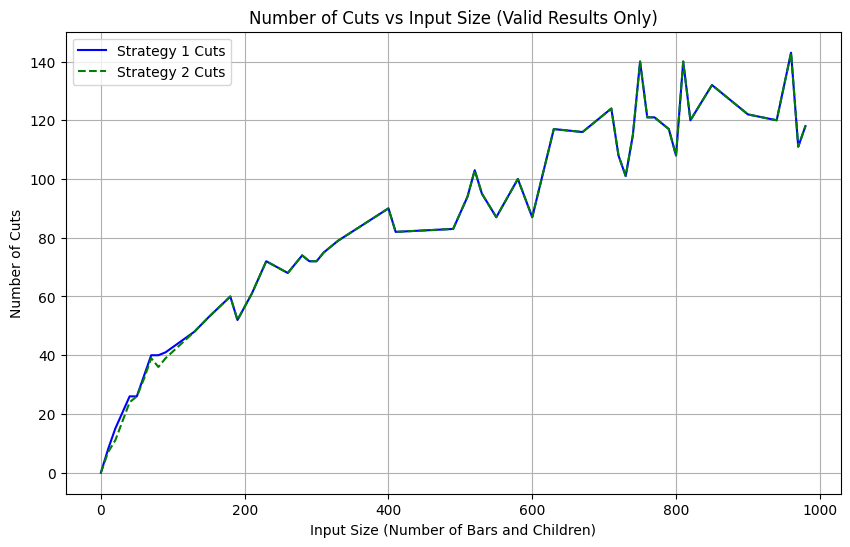

In [63]:
from tqdm import tqdm
import random
import matplotlib.pyplot as plt


# Generating test data and calculating cuts with a loading bar
input_sizes = range(0, 1000, 10)  # Input sizes from 0 to 1000 (in steps of 10)
valid_cuts_1 = []  # Store valid results for the first strategy
valid_cuts_2 = []  # Store valid results for the second strategy
valid_input_sizes = []

for size in tqdm(input_sizes, desc="Calculating cuts"):
    bars = [random.randint(1, 100) for _ in range(size)]
    children = [random.randint(1, 100) for _ in range(size)]

    # First strategy
    result1 = best_chocolate_strategy(bars, children)
    # Second strategy (re-run for comparison)
    result2 = combined_chocolate_distribution(bars, children)

    if result1 != -1 and result2 != -1:
        valid_cuts_1.append(result1)
        valid_cuts_2.append(result2)
        valid_input_sizes.append(size)

# Plotting the results (valid cuts only)
plt.figure(figsize=(10, 6))
plt.plot(valid_input_sizes, valid_cuts_1, linestyle='-', color='b', label="Strategy 1 Cuts")
plt.plot(valid_input_sizes, valid_cuts_2, linestyle='--', color='g', label="Strategy 2 Cuts")
plt.title("Number of Cuts vs Input Size (Valid Results Only)")
plt.xlabel("Input Size (Number of Bars and Children)")
plt.ylabel("Number of Cuts")
plt.legend()
plt.grid(True)
plt.show()


Why combine the 2 stratergies instead of them being seperate ?